# NYC Property Sales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.style as style

In [2]:
# Import the data

df_pre = pd.read_csv("nyc-rolling-sales.csv")
df_pre.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
#Want to examine the dataframe now
df_pre.shape

(84548, 22)

In [4]:
df_pre.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [5]:
df_pre.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

Will drop the Easement column as it don't hold any values at all. Will also drop the Unnamed:0 column as it does not hold any significant information.

In [7]:
del df_pre["EASE-MENT"]

In [8]:
del df_pre["Unnamed: 0"]

In [9]:
df_pre.shape

(84548, 20)

Although we don't have any null values it is important to notice that the "Sale Price" column has a number of rows that contain the symbol - 
 
This is essentially the same as having 0. The reason for this is given in the description of the dataset found at https://www.kaggle.com/new-york-city/nyc-property-sales. "Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement."

So we can do a number of things now. Can either remove the values with - or replace them with the mean value. I will be replacing with the mean. I will also be converting certain columns to the relevant dtypes. 

Later on in the code I will look at the distribution of sale price.

In [10]:
#Converting columns to the relevant data types
df_pre['TAX CLASS AT TIME OF SALE'] = df_pre['TAX CLASS AT TIME OF SALE'].astype('category')
df_pre['TAX CLASS AT PRESENT'] = df_pre['TAX CLASS AT PRESENT'].astype('category')
df_pre['BOROUGH'] = df_pre['BOROUGH'].astype('category')

df_pre["SALE PRICE"] = pd.to_numeric(df_pre["SALE PRICE"],errors = 'coerce')
df_pre["GROSS SQUARE FEET"] = pd.to_numeric(df_pre["GROSS SQUARE FEET"],errors ='coerce')
df_pre["LAND SQUARE FEET"] = pd.to_numeric(df_pre["LAND SQUARE FEET"],errors = 'coerce')

In [11]:
#Check for duplicated values
df_pre.duplicated().sum()

765

In [12]:
#Delete the duplicate values.
df_pre.drop_duplicates(inplace=True)
df_pre.duplicated().sum()

0

In [13]:
#Want to see if we have any null values
df_pre.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

Can see that three columns contain NAN values which are Land Square Feet, Gross Square Feet and Sale Price. Will not drop any of these variables and will replace the sale price nans with mean sale price.

In [14]:
df_pre["SALE PRICE"].fillna(df_pre["SALE PRICE"].mean(),inplace=True)
df_pre["LAND SQUARE FEET"].fillna(df_pre["LAND SQUARE FEET"].mean(),inplace=True)
df_pre["GROSS SQUARE FEET"].fillna(df_pre["GROSS SQUARE FEET"].mean(),inplace=True)

In [15]:
df_pre.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## Exploratory Data Analysis
Will carry out some visualisation of the dependent variable to get a feel for what the data looks like. 
There is a huge scope for data visualisation in this dataset so will only consider 1-2 visualisations max.

In [16]:
df = df_pre.copy()

In [17]:
#look at the relationship between sale price and borough
pivot = df.pivot_table(index = "BOROUGH", values = "SALE PRICE", aggfunc = "median")
pivot

,SALE PRICE
BOROUGH,
1,1.280703e+06
2,2.748970e+05
3,4.256050e+05
4,7.400000e+05
5,5.600000e+05


Text(0.5, 0, 'Borough')

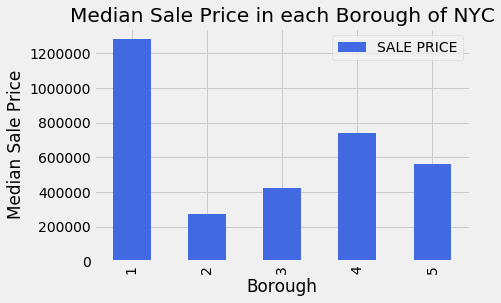

In [18]:
style.use("fivethirtyeight")
pivot.plot(kind='bar',color = 'royalblue' )
plt.title("Median Sale Price in each Borough of NYC")
plt.ylabel("Median Sale Price")
plt.xlabel("Borough")

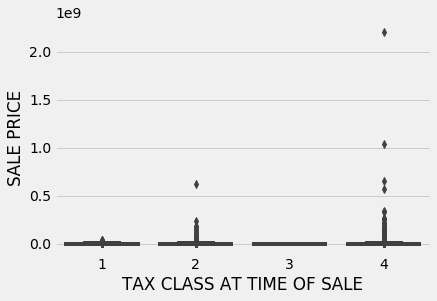

In [19]:
sns.boxplot(x="TAX CLASS AT TIME OF SALE",y="SALE PRICE" ,data = df)

In [20]:
IndexNames = df[(df["SALE PRICE"] >= 50000000)].index
df.drop(IndexNames, inplace=True)

In [21]:
IndexNames = df[(df["TAX CLASS AT PRESENT"] == 3)].index
df.drop(IndexNames, inplace=True)

In [22]:
IndexNames = df[(df["SALE PRICE"] >= 3500000)].index
df.drop(IndexNames, inplace=True)

Text(0, 0.5, 'Tax Class at time of sale')

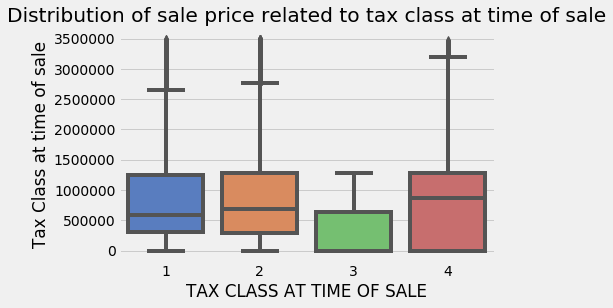

In [23]:
#plt.figure(figsize=(10,8))
sns.boxplot(x="TAX CLASS AT TIME OF SALE",y="SALE PRICE" ,data = df,palette = 'muted')

plt.title("Distribution of sale price related to tax class at time of sale")
plt.ylabel("Sale Price ($)")
plt.ylabel("Tax Class at time of sale")

In [24]:
IndexNames = df[(df["SALE PRICE"] >= 2000000)].index
df.drop(IndexNames, inplace=True)

(array([13426.,  5802.,  7167.,  8420.,  6994.,  5532.,  4351.,  2940.,
         1769., 16097.,  1309.,   981.,   948.,   711.,   509.]),
 array([      0.        ,  133333.26666667,  266666.53333333,
         399999.8       ,  533333.06666667,  666666.33333333,
         799999.6       ,  933332.86666667, 1066666.13333333,
        1199999.4       , 1333332.66666667, 1466665.93333333,
        1599999.2       , 1733332.46666667, 1866665.73333333,
        1999999.        ]),
 <a list of 15 Patch objects>)

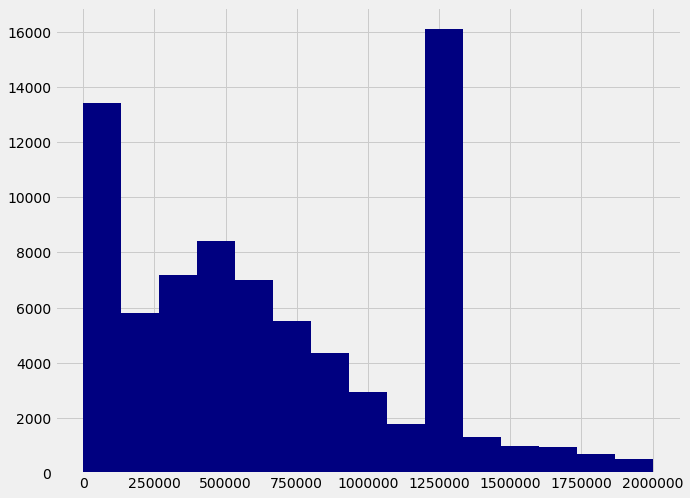

In [25]:
plt.figure(figsize=(10,8))
plt.hist(x="SALE PRICE",data=df,bins=15,color='navy')

In [26]:
indexNames = df[(df['SALE PRICE'] > 1200000) & (df['SALE PRICE'] <= 1300000) ].index
df.drop(indexNames,inplace=True)

(array([13426.,  5802.,  7167.,  8420.,  6994.,  5532.,  4351.,  2940.,
         1769.,   579.,  1309.,   981.,   948.,   711.,   509.]),
 array([      0.        ,  133333.26666667,  266666.53333333,
         399999.8       ,  533333.06666667,  666666.33333333,
         799999.6       ,  933332.86666667, 1066666.13333333,
        1199999.4       , 1333332.66666667, 1466665.93333333,
        1599999.2       , 1733332.46666667, 1866665.73333333,
        1999999.        ]),
 <a list of 15 Patch objects>)

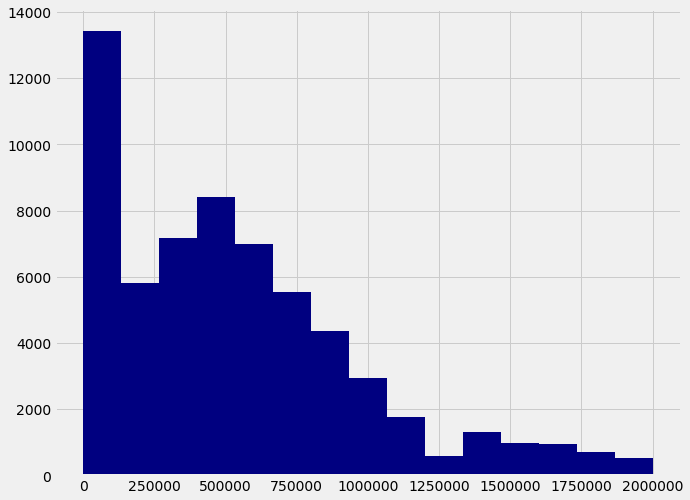

In [27]:
plt.figure(figsize=(10,8))
plt.hist(x="SALE PRICE",data=df,bins=15,color='navy')

In [28]:
indexNames = df[(df['SALE PRICE'] >= 0) & (df['SALE PRICE'] <= 100000) ].index
df.drop(indexNames,inplace=True)

Text(0, 0.5, 'Count of Properties')

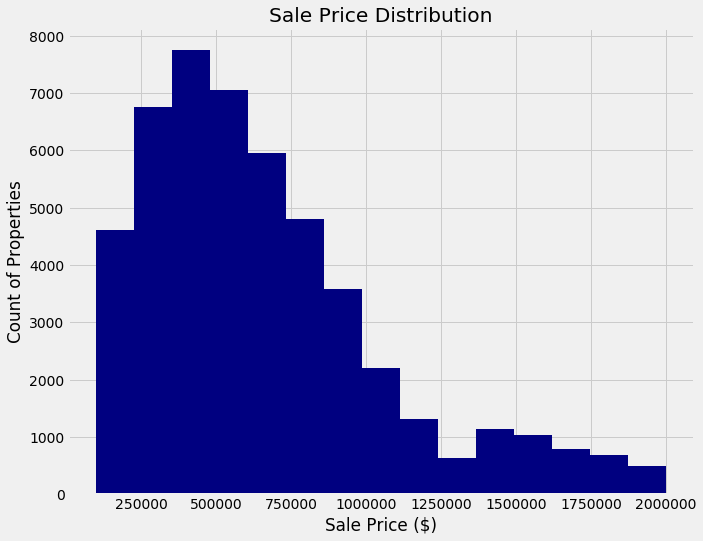

In [29]:
plt.figure(figsize=(10,8))
plt.hist(x="SALE PRICE",data=df,bins=15,color='navy')
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count of Properties")



Can now see that the sale price column is following an approximately normal distribution, even if it is slightly postively skewed.

In [30]:
df.shape

(48776, 20)

## Data preprocessing
Now that the data has been cleaned I want to one hot encode some of the qualitative features.
Will have a look at some of the quantitative features first

### Feature Selection

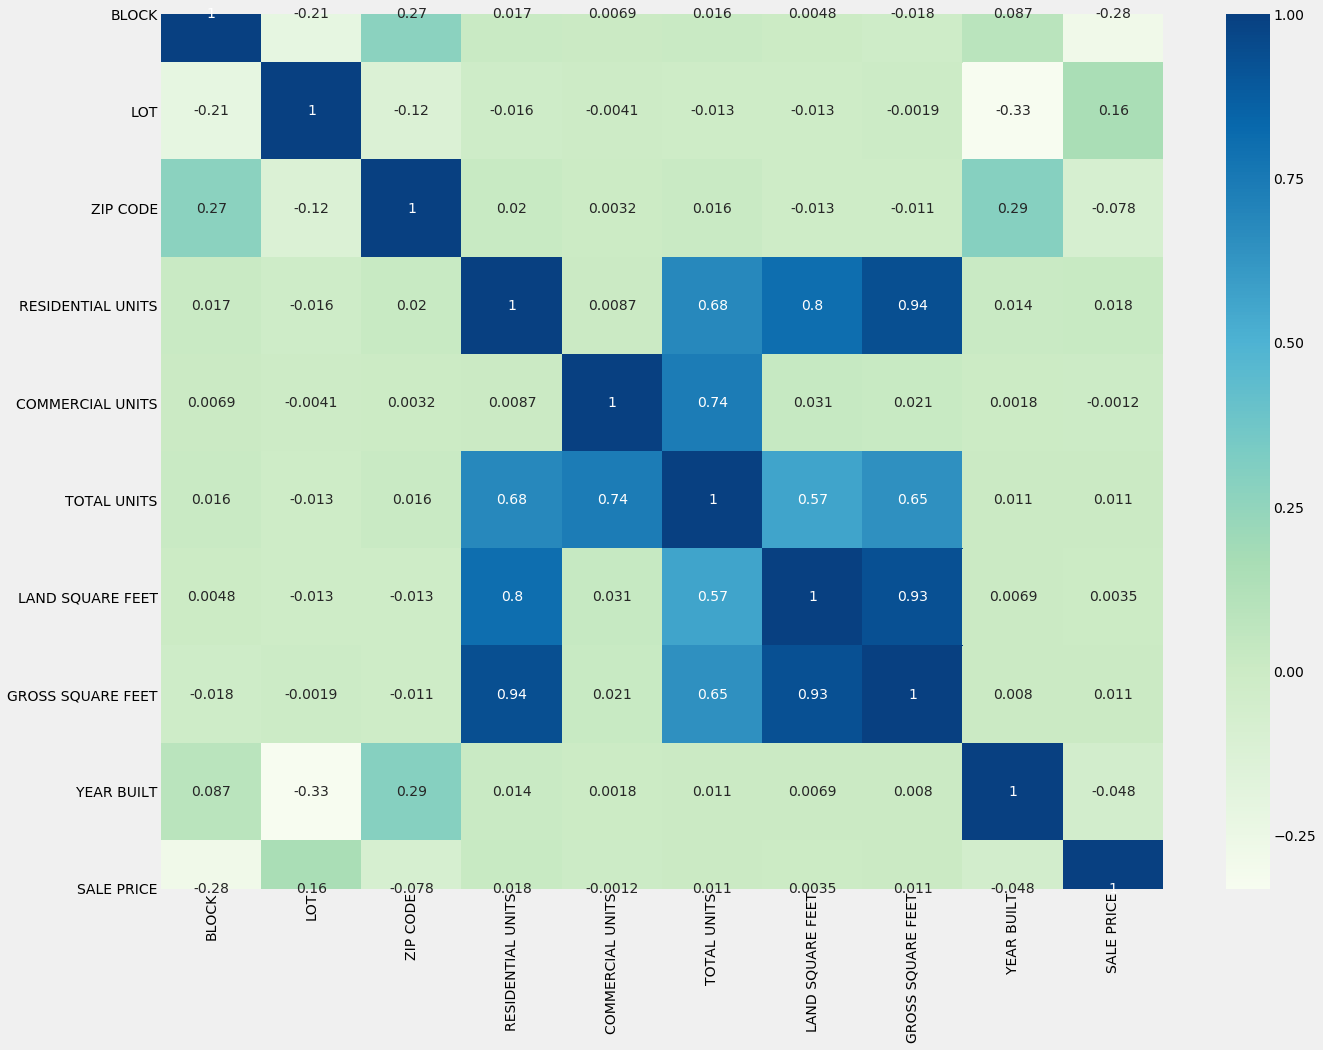

In [31]:
#Look at the correlation matrix first.
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,15))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap="GnBu")
plt.show()

As can be seen from the above correlation matrix there is multicollinearity between total units, commerical units, residential units and gross square feet. Will drop a few of these problematic features as my aim is to get a parsimonious model.

In [32]:
cor["SALE PRICE"].sort_values(ascending = False)

SALE PRICE           1.000000
LOT                  0.159827
RESIDENTIAL UNITS    0.017910
TOTAL UNITS          0.011326
GROSS SQUARE FEET    0.010589
LAND SQUARE FEET     0.003507
COMMERCIAL UNITS    -0.001198
YEAR BUILT          -0.047990
ZIP CODE            -0.078237
BLOCK               -0.275770
Name: SALE PRICE, dtype: float64

Will drop a few problematic variables because after examining the correlation matrix there is clear evidence of multicolllinearity. The variables that will be dropped are land square feet, residential units and commerical units and gross square feet. I will keep residential units as it is more correlated with sale price. 

In [33]:
df = df.drop(columns = ["LAND SQUARE FEET","GROSS SQUARE FEET", "TOTAL UNITS","COMMERCIAL UNITS",],axis=1)

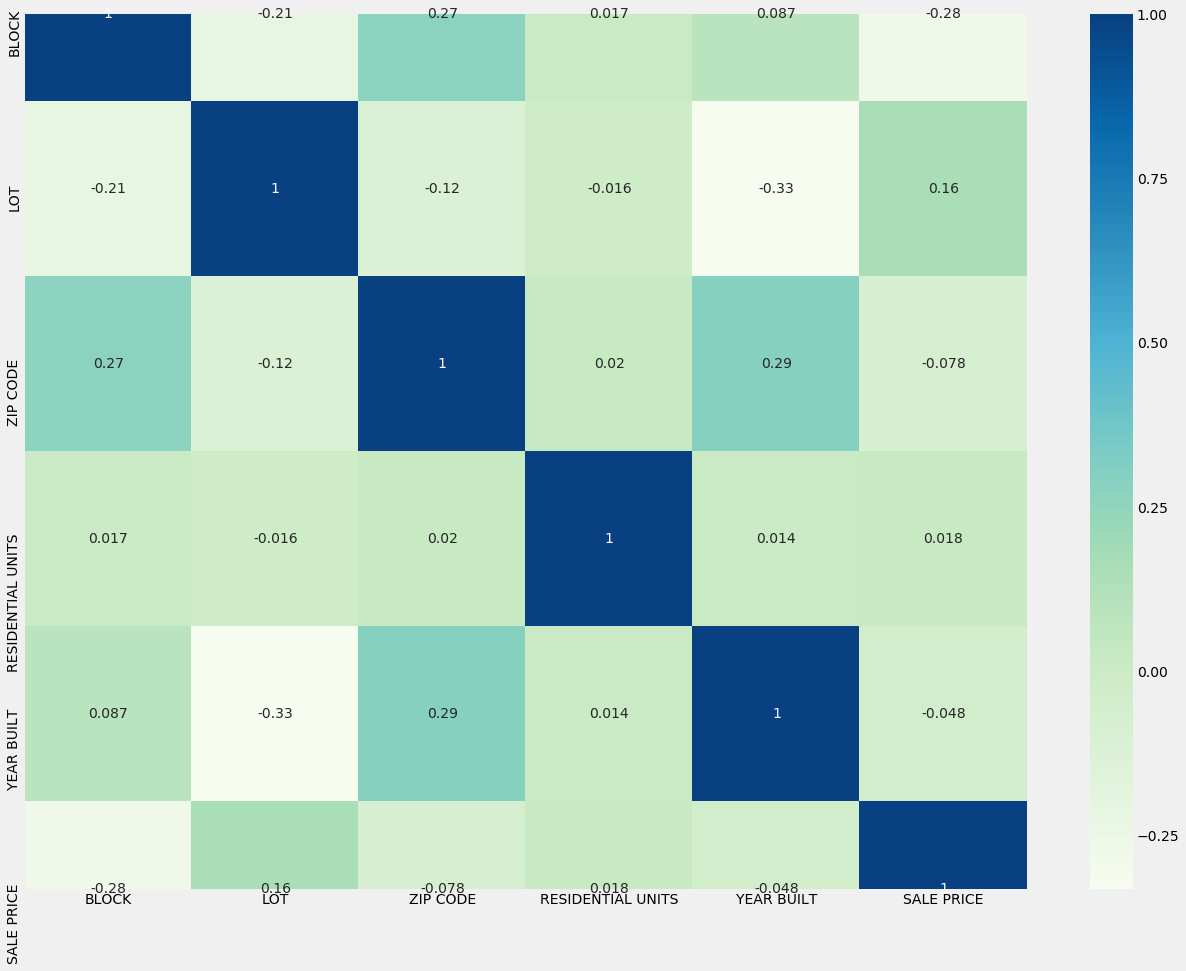

In [34]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,15))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap="GnBu")
plt.show()

In [35]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [36]:
print(len(df_pre["NEIGHBORHOOD"].unique()))
print(len(df_pre["BUILDING CLASS CATEGORY"].unique()))
print(len(df_pre["TAX CLASS AT PRESENT"].unique())) #
print(len(df_pre["BLOCK"].unique())) #Huge number of values - 11566
print(len(df_pre["LOT"].unique())) #Massive number of lot names -2627
print(len(df_pre["TAX CLASS AT TIME OF SALE"].unique())) # Will definetely encode this feature.
print(len(df_pre["APARTMENT NUMBER"].unique()))
print(len(df_pre["BUILDING CLASS AT TIME OF SALE"].unique()))


254
47
11
11566
2627
4
3989
166


In [37]:
#Will convert borough and other features to dummy variables.
#Will create a new dataframe in the process.
df_new = pd.get_dummies(df, columns = ["BOROUGH","TAX CLASS AT TIME OF SALE","TAX CLASS AT PRESENT"])
df_new.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,YEAR BUILT,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
13,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,C6,"327 EAST 3 STREET, 1C",,10009,0,1920,...,0,0,0,0,1,0,0,0,0,0
15,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,0,1920,...,0,0,0,0,1,0,0,0,0,0
16,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,C6,"327 EAST 3 STREET, 2E",,10009,0,1920,...,0,0,0,0,1,0,0,0,0,0
17,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,46,C6,"317 EAST 3RD STREET, 12",,10009,0,1925,...,0,0,0,0,1,0,0,0,0,0
18,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,49,C6,"311 EAST 3RD STREET, 17",,10009,0,1920,...,0,0,0,0,1,0,0,0,0,0


In [38]:
#Will drop features I won;t be using
df_new = df_new.drop(columns = ["NEIGHBORHOOD","BUILDING CLASS CATEGORY","ADDRESS",
                       "APARTMENT NUMBER","SALE DATE","BUILDING CLASS AT PRESENT"],axis=1)

In [39]:
df_new = df_new.drop(columns = ["BUILDING CLASS AT TIME OF SALE"],axis=1)

In [40]:
df_new.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
13,373,40,10009,0,1920,499000.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,373,40,10009,0,1920,529500.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16,373,40,10009,0,1920,423000.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17,373,46,10009,0,1925,501000.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18,373,49,10009,0,1920,450000.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df_new.shape

(48776, 26)

## ML Model Implementation

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [55]:
# Final Selection of features
# Done this way so that we can easily retest the models by leaving some features in or out each time.
X = df_new.loc[:,df_new.columns != "SALE PRICE"]
X = X.to_numpy()
X[0:5]

array([[  373,    40, 10009,     0,  1920,     1,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0],
       [  373,    40, 10009,     0,  1920,     1,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0],
       [  373,    40, 10009,     0,  1920,     1,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0],
       [  373,    46, 10009,     0,  1925,     1,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0],
       [  373,    49, 10009,     0,  1920,     1,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0]],

In [56]:
#Will normalize the X data before splitting X and y into train and test sets
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.15030373, -0.48811428, -0.71052299, -0.12403017,  0.19308793,
         2.07893863, -0.31531765, -0.58997765, -0.72988211, -0.36206372,
        -1.00976558,  1.05597636,  0.        , -0.15118817, -0.09001029,
        -0.94769215, -0.14940514, -0.08525915, -0.0464472 ,  1.17825622,
        -0.13617367, -0.05441519, -0.16164364,  0.        , -0.15090417],
       [-1.15030373, -0.48811428, -0.71052299, -0.12403017,  0.19308793,
         2.07893863, -0.31531765, -0.58997765, -0.72988211, -0.36206372,
        -1.00976558,  1.05597636,  0.        , -0.15118817, -0.09001029,
        -0.94769215, -0.14940514, -0.08525915, -0.0464472 ,  1.17825622,
        -0.13617367, -0.05441519, -0.16164364,  0.        , -0.15090417],
       [-1.15030373, -0.48811428, -0.71052299, -0.12403017,  0.19308793,
         2.07893863, -0.31531765, -0.58997765, -0.72988211, -0.36206372,
        -1.00976558,  1.05597636,  0.        , -0.15118817, -0.09001029,
        -0.94769215, -0.14940514, -0.08525915, -0

In [57]:
y = df_new.loc[:,"SALE PRICE"]

y = y.to_numpy()
y[0:5]

array([499000., 529500., 423000., 501000., 450000.])

## Splitting into train and test sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (39020, 25) (39020,)
Test set: (9756, 25) (9756,)


## K-nearest neighbors

In [59]:
k = 3

knn = KNeighborsRegressor(n_neighbors = k, weights = 'uniform',metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [60]:
yhat = knn.predict(X_test)
yhat[0:5]

array([405000.        , 943000.        , 806000.        , 257000.        ,
       504333.33333333])

In [61]:
from sklearn.metrics import r2_score
print("R-squared: ",r2_score(y_test,yhat))
print("MAE:", metrics.mean_absolute_error(y_test, yhat))
print('MSE:', metrics.mean_squared_error(y_test, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

R-squared:  0.49030519042573895
MAE: 192475.42592592596
MSE: 82381348034.21564
RMSE: 287021.51144855964


## Important

It should be noted that the below piece of code does take some time to run. However, it is important in determing what the best value of k for the model.

In [50]:
#Can also use GridSearch to find the best value instead of the elbow method.
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 10}

In [62]:
#Will run the model again with the updated list of neighbors.

knn = KNeighborsRegressor(n_neighbors = 10, weights = 'uniform',metric='minkowski').fit(X_train,y_train)
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [63]:
yhat = knn.predict(X_test)
yhat[0:5]

array([469300. , 934900. , 914700. , 367878.1, 484580. ])

In [64]:
print("R-squared: ",r2_score(y_test,yhat))
print("MAE:", metrics.mean_absolute_error(y_test, yhat))
print('MSE:', metrics.mean_squared_error(y_test, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

R-squared:  0.5211586287536999
MAE: 190014.54007790078
MSE: 77394544572.2164
RMSE: 278198.75012698455


## Decision Trees

In [65]:
dt = DecisionTreeRegressor(random_state=3,max_depth=12)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [66]:
treepred = dt.predict(X_test)
treepred

array([532616.97959184, 817428.79845626, 817428.79845626, ...,
       612032.29943503, 273049.35833333, 828223.57425743])

In [67]:
print("R-squared:", r2_score(y_test,treepred)) 
print("MAE:", metrics.mean_absolute_error(y_test,treepred))
print("MSE:",metrics.mean_squared_error(y_test,treepred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,treepred)))

R-squared: 0.48181374498938745
MAE: 195148.79806472769
MSE: 83753809963.71799
RMSE: 289402.50510961027


## Random Forest Regressor

In [68]:
rf = RandomForestRegressor(random_state= 3,max_depth = 12,n_estimators = 15)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=3, verbose=0,
                      warm_start=False)

In [69]:
predforest = rf.predict(X_test)
predforest

array([544193.98410342, 852643.21003881, 837671.72947393, ...,
       551042.72035825, 267307.29747871, 830733.88933074])

In [70]:
print("R-squared score: ",r2_score(y_test, predforest))
print("MAE:", metrics.mean_absolute_error(y_test, predforest))
print('MSE:', metrics.mean_squared_error(y_test, predforest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predforest)))

R-squared score:  0.5541353672081224
MAE: 183907.9721245409
MSE: 72064554710.4082
RMSE: 268448.4209497389


## Evaluation Scores

| Evaluation Metric | K-Nearest Neighbors | Decision Tree | Random Forest | 
|------|------|------|------|
| R-squared | 0.522| 0.4818 |0.5541|
| Mean Absolute Error (MAE) | 189612| 195148|183907|
| Mean Squared Error (MSE) | 7715764524 | 83753809963|72064554710|
| Root Mean Squared Error (RMSE) | 277772 | 289402 | 268448|